In [1]:
import sys

In [2]:
sys.path.append('C:\\Users\\Lenovo\\Google Drive\\UC Berkeley\\Capstone\\capstone-project\\src\\otm')
from otm_env import *
sys.path.append('C:\\Users\\Lenovo\\Google Drive\\UC Berkeley\\Capstone\\capstone-project\\src\\agents')
from tab_q_learning import *
from matplotlib import pyplot as plt
import os
import inspect
from tqdm import tqdm

In [3]:
env_init_info = {
    "time_step": 60,
    "plot_precision": 2,
    "num_states": 2,
    "num_actions": 2,
    "buffer": True
}


configfile = 'network_1.xml'

env = otmEnvDiscrete(env_init_info, configfile)

agent_init_info = {
            "num_states": env_init_info["num_states"]**6,
            "num_actions": env_init_info["num_actions"]**3,
            "epsilon": 0.2,
            "step_size": 0.1,
            "discount": 0.9,
            "seed": 0
            }

agent = QLearningAgent()
agent.agent_init(agent_init_info)

 10%|▉         | 99/1000 [00:37<06:01,  2.49it/s]

Time-step: 100/1000


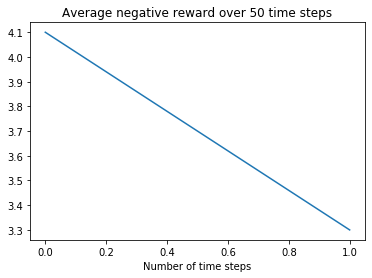

 20%|█▉        | 199/1000 [01:17<05:09,  2.59it/s]

Time-step: 200/1000


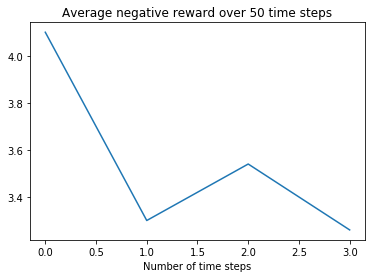

 30%|██▉       | 299/1000 [01:59<04:25,  2.64it/s]

Time-step: 300/1000


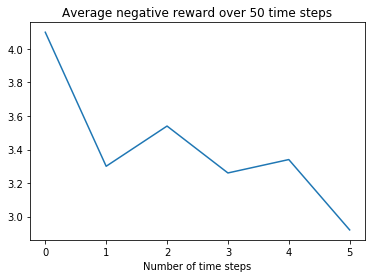

 40%|███▉      | 399/1000 [02:40<04:19,  2.32it/s]

Time-step: 400/1000


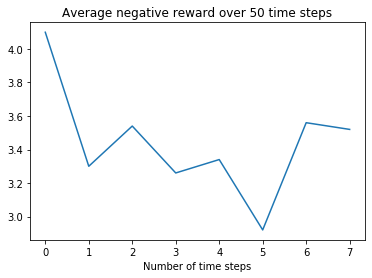

 50%|████▉     | 499/1000 [03:20<03:10,  2.63it/s]

Time-step: 500/1000


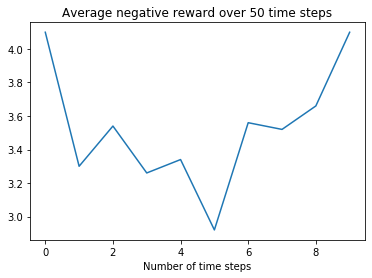

 60%|█████▉    | 599/1000 [03:59<02:44,  2.44it/s]

Time-step: 600/1000


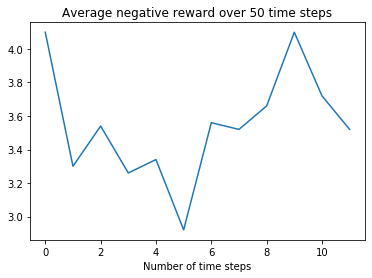

 70%|██████▉   | 699/1000 [04:42<01:57,  2.57it/s]

Time-step: 700/1000


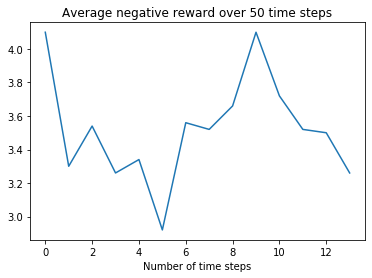

 80%|███████▉  | 799/1000 [05:22<01:20,  2.48it/s]

Time-step: 800/1000


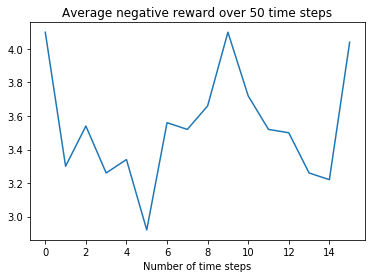

 90%|████████▉ | 899/1000 [06:03<00:41,  2.41it/s]

Time-step: 900/1000


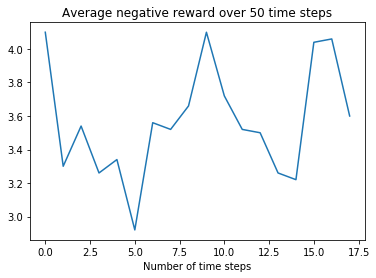

100%|█████████▉| 999/1000 [06:43<00:00,  2.32it/s]

Time-step: 1000/1000


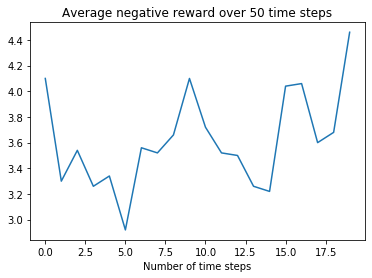

100%|██████████| 1000/1000 [06:44<00:00,  2.47it/s]


In [4]:
acc_neg_reward = [-6] # Contains negative sum of rewards during episode
num_steps = 1000 # The number of steps to run the simulation
reward_sum = 0

state, _ = env.reset()
action = agent.agent_start(state)
    
for i in tqdm(range(num_steps)):
    
    state, reward = env.step(action)
    action = agent.agent_step(reward, state)
    
    reward_sum += reward
    
    if (i+1) % 50 == 0:
        acc_neg_reward.append(-reward_sum/50)
        reward_sum = 0
    
    if (i+1) % 100 == 0:
        print("Time-step: " + str(i+1) + "/" + str(num_steps))
        plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
        plt.xlabel("Number of time steps")
        plt.title("Average negative reward over 50 time steps")
        plt.show()

In [5]:
agent.q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.5       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        

In [ ]:
plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
plt.xlabel("Number of time steps")
plt.title("Average negative reward over 50 time steps")

In [ ]:
def argmax(q_values):
    """argmax with random tie-breaking
    Args:
        q_values (Numpy array): the array of action-values
    Returns:
        action (int): an action with the highest value
    """
    top = float("-inf")
    ties = []

    for i in range(len(q_values)):
        if q_values[i] > top:
            top = q_values[i]
            ties = []

        if q_values[i] == top:
            ties.append(i)

    return np.random.RandomState(0).choice(ties)

In [ ]:
del env

env_init_info = {
    "time_step": 120,
    "plot_precision": 4,
    "num_states": 3,
    "num_actions": 2,
    "buffer": True
}

env2 = otmEnvDiscrete(env_init_info, configfile)

In [ ]:
env2.otm4rl.initialize()
state = env2.encode_state(env2.otm4rl.get_queues())
    
for i in range(50):
    
    action = argmax(agent.q[state])
    state, reward = env2.step(action)

In [ ]:
env2.plot_queues(2, "waiting")

In [ ]:
env2.plot_queues(3, "waiting")

In [ ]:
env2.plot_queues(4, "waiting")